In [1]:
import numpy as np

### Содержание
- [Класс Perceptron](#Perceptron)

### Perceptron

In [2]:
class Perceptron(object):
    '''Классификатор на основе персептрона.
    
    Параметры
    ---------
    eta: float
        Темп обучения (между 0.0 и 1.0)
    n_iter: int
        Проходы по треиновочному набору данных.
        
    Атрибуты
    --------
    w_: 1-мерный массив
        Весовые коэффициенты после подгонки.
    erroers_: список
        Число случаев ошибочной классификации в каждой эпохе.
        
    '''
    
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter
        
    def fit(self, X, y):
        '''
        Выполнить подгонку модели под тренировочные данные.
        
        Параметры
        ---------
        X: {массивоподобный}, форма = [n_samples, n_features]
            тренировоные векторы, где
            n_samples - число образцов и 
            n_features - число признаков.
        y: массиводобный, форма = [n_samples]
            Целевые значения.
            
        Возвращает
        ----------
        self: object
        
        '''
        
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0]  += update
                errors      += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        '''
        Рассчитать чистый вход
        '''
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        '''
        Вернуть метку класса после единичного скачка
        '''
        return np.where(self.net_input(X) >= 0.0, 1, -1)

### Тренировка модели персептрона на Iris датасете

[[обратно к содержанию](#Содержание)]

#### Чтение данных

In [6]:
import pandas as pd
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df = pd.read_csv(url, header=None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


#### Графическое отображение данных Iris

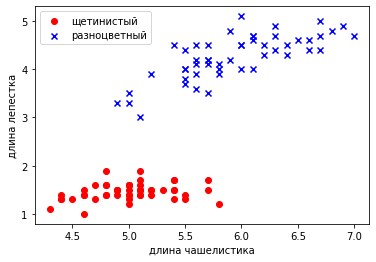

In [13]:
import matplotlib.pyplot as plt

y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)
X = df.iloc[0:100, [0, 2]].values
plt.scatter(X[:50, 0], X[:50, 1],
           color='red', marker='o', label='щетинистый')
plt.scatter(X[50:100, 0], X[50:100, 1],
           color='blue', marker='x', label='разноцветный')
plt.xlabel('длина чашелистика')
plt.ylabel('длина лепестка')
plt.legend(loc='upper left')
plt.show()